In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
#I will load in the data, using (read_csv) function. Dataset
#is downloaded from Kaggle here, in csv format('tmdb-movies.csv'). 
#And i will check for cleanliness, and then trim and clean the dataset for analysis.


In [4]:
# Load data into a pandas dataframe and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
# number of columns and rows 
df.shape

(10866, 21)

In [6]:
# Inspect data for errors or missing inputs 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# summary and sum of null values in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

This dataset consists of 10866 rows and 21 columns with different data types with a sum of 13,434 null values which will be dropped from the dataset. Wrong inputs such as zero budget and revenue will also be droped from the data set. Another thing to keep in mind is that there are some columns that we don't need in our analysis and whose presence or absence has no bearing on our calculations, such as ['tagline', 'keywords', 'overview', 'homepage'] will also be droped from the dataset.

### Data Cleaning

In [8]:
# droping unneeded columns
df.drop(['tagline', 'keywords', 'overview', 'homepage'], axis=1, inplace=True)
# confirm changes
# df.shape
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
# Droping null values in rows 
df.dropna(inplace=True)
# confirming update
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [10]:
# droping rows with budget equal to zero
df.drop(df.query('budget == 0').index, inplace=True)

In [11]:
# droping rows with revenue equal to zero
df.drop(df.query('revenue == 0').index, inplace=True)

In [12]:
# checking size of data set to confirm
df.shape

(3806, 17)

In [13]:
# indexing movie title 
df.set_index('original_title', inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,,,,,,,,,
Jurassic World,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [14]:
# searching for duplicates and drop them
sum(df.duplicated())
df.drop_duplicates(inplace=True)

In [15]:
# df.info()

## Exploratory Data Analysis


  Research Quesion 1: How does the duration or Runtime of a movie affect it's average vote?
  
  Do people tend to love long hour movies compared to shorter ones? This study is to find out the answers to this question.
 

In [16]:
# adding an additional column to dataframe to group runtimes between time frames in hours
df['runtime_bins'] = pd.cut(df['runtime'], bins=6, labels=('1hr', '2hrs', '3hrs', '4hrs', '5hrs', '6hrs'))
df.head()

,id,imdb_id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_bins
original_title,,,,,,,,,,,,,,,,,
Jurassic World,135397,tt0369610,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,3hrs
Mad Max: Fury Road,76341,tt1392190,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2hrs
Insurgent,262500,tt2908446,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,2hrs
Star Wars: The Force Awakens,140607,tt2488496,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,3hrs
Furious 7,168259,tt2820852,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,3hrs


In [17]:
# extracting runtime_bins and vote_average
df_hrs = df[['runtime_bins' ,'vote_average']]
df_hrs.head()

,runtime_bins,vote_average
original_title,,
Jurassic World,3hrs,6.5
Mad Max: Fury Road,2hrs,7.1
Insurgent,2hrs,6.3
Star Wars: The Force Awakens,3hrs,7.5
Furious 7,3hrs,7.3


In [18]:
# Grouping by runtime_bins
visual = df_hrs.groupby(['runtime_bins']).mean()
visual

,vote_average
runtime_bins,
1hr,6.550000
2hrs,6.047660
3hrs,6.618558
4hrs,7.064865
5hrs,6.300000
6hrs,6.200000


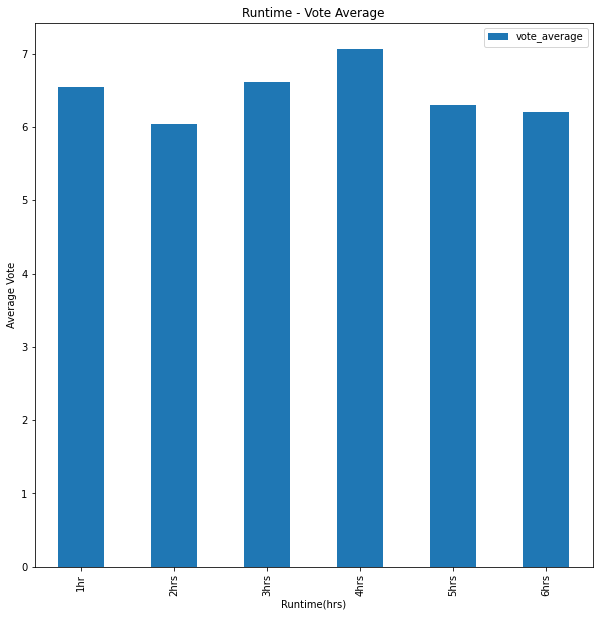

In [19]:
visual.plot(xlabel="Runtime(hrs)", ylabel="Average Vote",kind="bar", figsize=(10, 10), title ="Runtime - Vote Average");

The Graph above show a graphical representation of "Vote Average aganinst Runtimes". From the analysis I have noticed that movies in the timeframe of 3 - 4 hours tend to get more votes over the years.

## Question 2
Runtime vs Revenue

In [20]:
# df_q2 = df[['runtime_bins', 'revenue']]
# df_q2.head(1)

In [21]:
# df_q2.shape

In [22]:
# df_q2.describe

In [23]:
# visual = df_q2.groupby(['runtime_bins']).sum()
# visual

In [24]:
# df_q2.hist();

In [25]:
# visual.plot(kind = 'bar');

# Runtime against popularity

In [26]:
df_q3 = df[['runtime_bins', 'popularity']]

In [27]:
df_q3.head()

,runtime_bins,popularity
original_title,,
Jurassic World,3hrs,32.985763
Mad Max: Fury Road,2hrs,28.419936
Insurgent,2hrs,13.112507
Star Wars: The Force Awakens,3hrs,11.173104
Furious 7,3hrs,9.335014


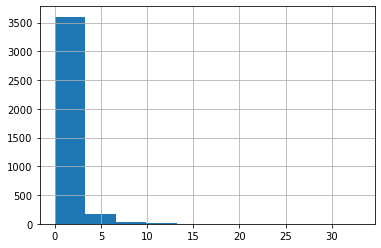

In [28]:
df_q3.popularity.hist();

## popularity

In [34]:
# df_pop = df[['genres', 'popularity', 'release_year']]
# df_pop.head()

In [35]:
# df_pop.max()

In [31]:
# df_pop.groupby(['release_year', 'genres'], as_index=False).mean()

In [36]:
# df_pop.query('release_year >= 2005').groupby(['release_year', 'genres']).mean()

In [37]:
# cols = ['original_title', 'vote_average']
# vote_average_df = df.sort_values('vote_average', ascending=False)[cols].set_index('original_title')
# top_5 = vote_average_df.head(5)
# sns.barplot(data=top_5, x=top_5.index, y='vote_average');
# plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
# plt.title('Top 5 Highest Voted Average Movies', fontsize=15);